# Introduction to Time Series    


## References

Some helpful references, in order of difficulty

*   Hyndman & Athanasopoulos: [Forecasting: principles and practice](https://www.otexts.org/fpp)
*   Shumway & Stoffer: [Time Series & Applications: w. R Examples](http://www.stat.pitt.edu/stoffer/tsa4/index.html)   
*   Box, Jenkins: [Time Series Analysis: forecasting and Control](https://www.amazon.com/Time-Analysis-Forecasting-Probability-Statistics/dp/1118675029)    
*   Hamilton: [Time Series Analysis](http://press.princeton.edu/titles/5386.html)  

### Specialization on economics/finance
*   Tsay [Analysis of Financial Time Series](https://www.amazon.com/Analysis-Financial-Time-Ruey-Tsay/dp/0470414359)  
*   Tsay [Introduction to Analysis of Financial Data](https://www.amazon.com/Introduction-Analysis-Financial-Data/dp/0470890819)  
*   Enders: [Applied Econometric Time Series](http://www.wiley.com/WileyCDA/WileyTitle/productCd-EHEP003218.html)
*   Elliott & Timmermann: [Economic forecasting](http://press.princeton.edu/titles/10740.html)


## Time Series Data  

* Time series data is a sequence of observations of some quantity of interest, which are collected over time, such as:
    * GDP
    * The price of gold or a stock
    * Demand for a good
    * Unemployment
    * Web traffic (clicks, logins, posts, etc.)  

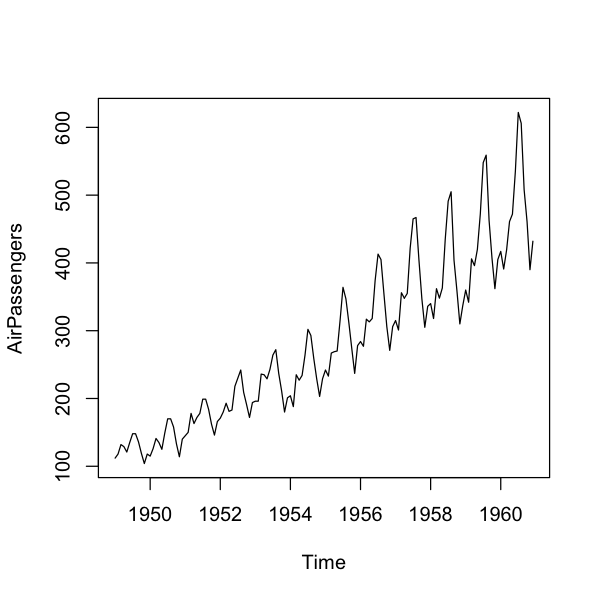

In [20]:
options(repr.plot.height = 5, repr.plot.width = 5)
plot(AirPassengers)

### Definition  

We assume a time series, $\left\{y_t \right\}$, has the following properties:

*   $y_t$ is an observation of the level of $y$ at time $t$
*   $\left\{y_t \right\}$ is time series, i.e., the collection of observations:
    -   May extend back to $t = 0$ or $t = -\infty$, depending on the problem.
    -   E.g., $t \in \left\{0, ..., T\right\}$
*   Starting after time t, we typically want to forecast y out to a "horizon" h, namely forecasting values $y_{t+1}, y_{t+2}, ... y_{t+h}$.  
To emphasize our knowledge of y up to time t, this can be written as $y_{t+1|t}, y_{t+2|t}, ... y_{t+h|t}$

### Assumptions  

* Discrete time:  

    * Sampling at regular intervals
    * ... even if process is continuous  
    
* Evenly spaced observations
* No missing observations

### Caveat: only one observation?  

Time series are hard to model because we only observe one realization of
the path of the process:
* Often have limited data
* Must impose structure – such as assumptions of about correlation – in order to model
* Must project beyond support of the data

## Time Series Analysis  

* The analysis of experimental data that have been observed at different points in time (usually equally spaced time points)

* The obvious correlation introduced by the sampling of
adjacent points in time can severely restrict the applicability of
conventional statistical methods which are based on
independent and identically distributed data

### Basic Methodology  

* A "pattern" is first attained from the data at hand
* The "pattern" is then extrapolated into the future to prepare a forecast

**Assumptions**: The "pattern" we've observed will continue...  

**Some applications**:  

* Predicting/forecasting future gas prices
* Global warming? Predicting future global temperatures
* Population growth

## Components of a Time Series  

* Trend: the long-run upward or downward movement of
the series
* Cycle: the upward or downward movement of the series
around the trend (think of a wave)
* Seasonal Variations: patterns in the data that follow
yearly patterns (think of seasonal temperatures)
* Irregular Variations: the remaining erratic movements in
the series that cannot be accounted for  

Our **goal** is to estimate the trend, cycle, and seasonal
components of a time series so that all that is left is irregular
fluctuations (often referred to as white noise).

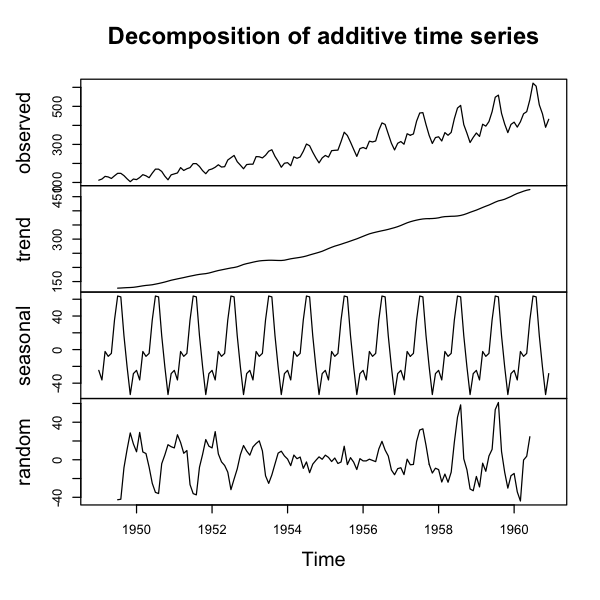

In [21]:
plot(decompose(AirPassengers))

In [2]:
# Alternatively
install.packages("forecast")
library(forecast)
fit = stl(AirPassengers, s.window = "periodic")
plot(fit)

also installing the dependencies ‘quadprog’, ‘tseries’

Warning message in install.packages("forecast"):
“installation of package ‘quadprog’ had non-zero exit status”Warning message in install.packages("forecast"):
“installation of package ‘tseries’ had non-zero exit status”Warning message in install.packages("forecast"):
“installation of package ‘forecast’ had non-zero exit status”

ERROR: Error in library(forecast): there is no package called ‘forecast’


> Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of fixed period then they are cyclic; if the period is unchanging and associated with some aspect of the calendar, then the pattern is seasonal. In general, the average length of cycles is longer than the length of a seasonal pattern, and the magnitude of cycles tends to be more variable than the magnitude of seasonal patterns.

**Exercise**: What components do we see in these time series plots?  

<img src="images/decomp1.png" width="700"> 

## Time Series Decomposition  

* An additive model  

$$ y_t=S_t+T_t+E_t $$  

where $y_t$ is the data at period $t$, $S_t$ is the seasonal component at period $t$, $T_t$ is the trend-cycle component at period $t$ and $E_t$ is the remainder (or irregular or error) component at period $t$  

* A multiplicative model  

$$ y_t=S_t \times T_t \times E_t $$  

> The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative model is more appropriate. With economic time series, multiplicative models are common.

> An alternative to using a multiplicative model, is to first transform the data until the variation in the series appears to be stable over time, and then use an additive model. When a log transformation has been used, this is equivalent to using a multiplicative decomposition because 
$ y_t=S_t\times T_t\times E_t$ is equivalent to $log(y_t)= log (S_t) + log(T_t) + log(E_t)$.

> Sometimes, the trend-cycle component is simply called the “trend” component, even though it may contain cyclic behaviour as well.

In [28]:
airdecomp = decompose(AirPassengers)
airdecomp

$x
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

$seasonal
            Jan        Feb        Mar        Apr        May        Jun
1949 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1950 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1951 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1952 -24.7487

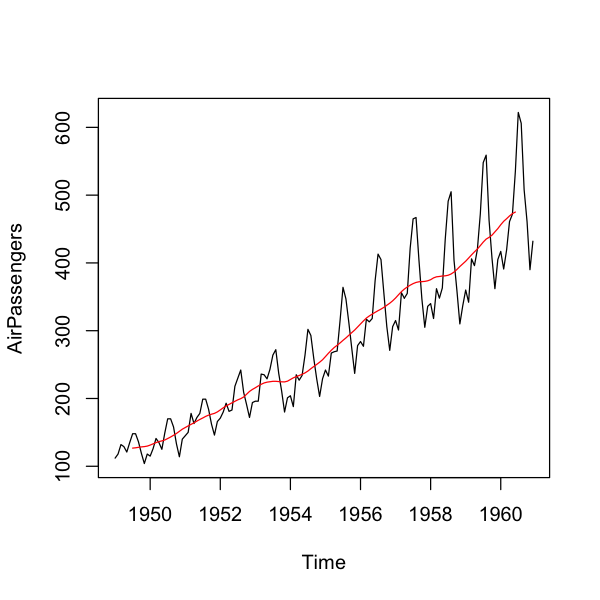

In [49]:
plot(AirPassengers)
lines(airdecomp$trend, col = "red")

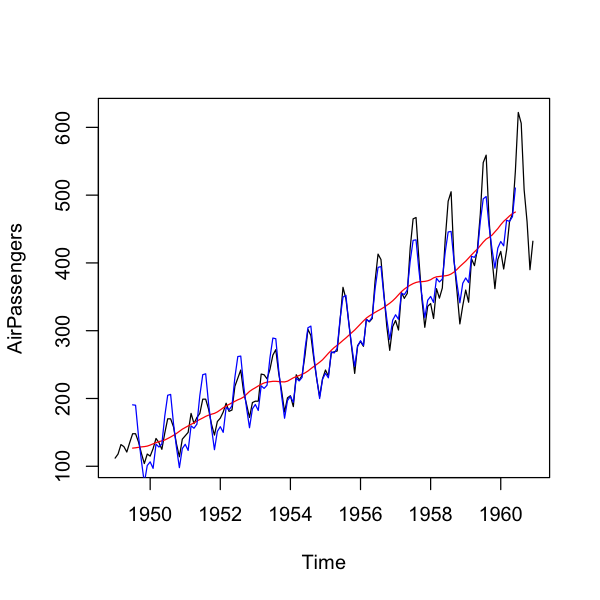

In [50]:
plot(AirPassengers)
lines(airdecomp$trend, col = "red")
lines(airdecomp$trend + airdecomp$seasonal, col = "blue")

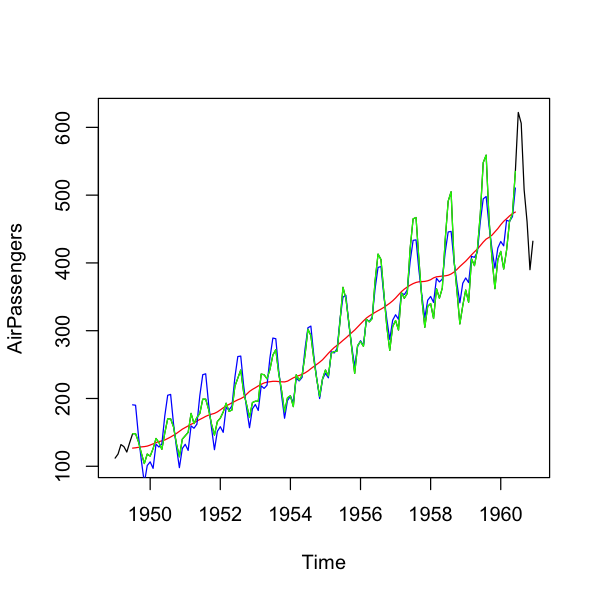

In [51]:
plot(AirPassengers)
lines(airdecomp$trend, col = "red")
lines(airdecomp$trend + airdecomp$seasonal, col = "blue")
lines(airdecomp$trend + airdecomp$seasonal + airdecomp$random, col = "green")

## Moving Average Smoothing   

* A moving average of order $m$ can be written as  

$$ \hat{T}_t = \frac{1}{m} \sum_{j = −k}^k y_{t+j} $$  

where $ m = 2k + 1$  

* We call this an $m$-MA

* This estimates the trend-cycle at time $t$ by averaging values of the time series within $k$ periods of $t$.  


In [35]:
ma(AirPassengers, order = 5)

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1949    NA    NA 122.4 127.0 133.0 136.2 137.6 137.2 131.0 125.0 118.4 116.4
1950 120.8 127.0 128.4 135.2 144.0 149.8 154.4 156.0 149.0 143.0 138.0 136.4
1951 145.4 155.2 161.6 168.2 178.0 182.2 186.4 184.4 178.0 171.4 165.8 165.0
1952 171.2 178.2 181.6 191.0 201.0 210.8 216.4 218.0 208.8 201.6 192.4 189.8
1953 198.8 211.4 218.4 227.8 241.4 248.6 249.0 245.4 232.8 220.2 206.6 196.8
1954 201.6 211.0 217.6 229.6 252.4 264.0 270.4 269.4 257.2 242.6 232.4 227.2
1955 234.8 248.0 256.2 270.8 297.0 313.0 321.6 322.4 306.8 289.6 277.0 270.0
1956 278.6 293.8 301.8 319.8 347.0 364.6 373.0 370.6 350.0 328.6 310.6 299.8
1957 309.8 325.2 335.0 356.4 389.2 411.4 422.6 421.0 397.6 371.8 346.4 329.2
1958 332.2 340.8 346.2 365.2 399.8 428.4 439.6 438.8 413.8 383.0 354.0 341.6
1959 351.0 368.2 384.8 407.2 448.4 479.0 492.4 489.8 467.8 439.2 410.8 396.4
1960 398.8 418.6 432.0 455.6 501.8 539.2 548.6 546.4 517.4 479.4    NA    NA

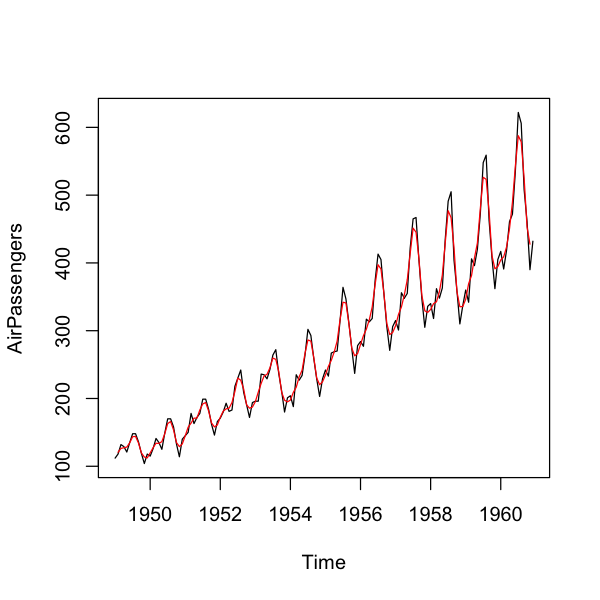

In [52]:
plot(AirPassengers)
lines(ma(AirPassengers, order = 3), col = "red")

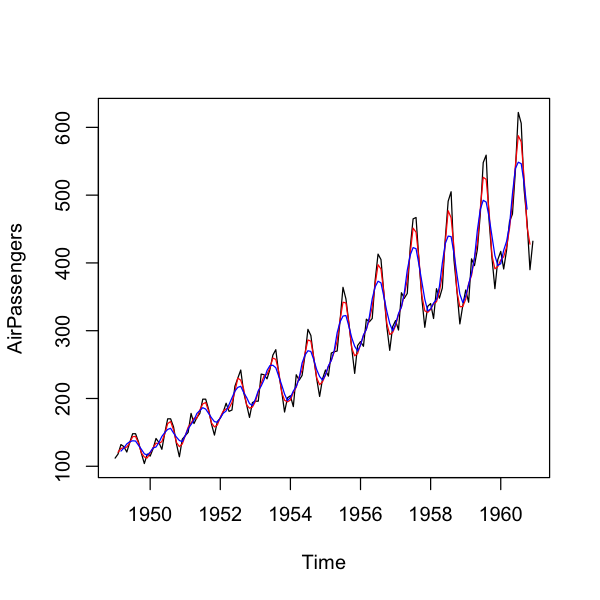

In [55]:
plot(AirPassengers)
lines(ma(AirPassengers, order = 3), col = "red")
lines(ma(AirPassengers, order = 5), col = "blue")

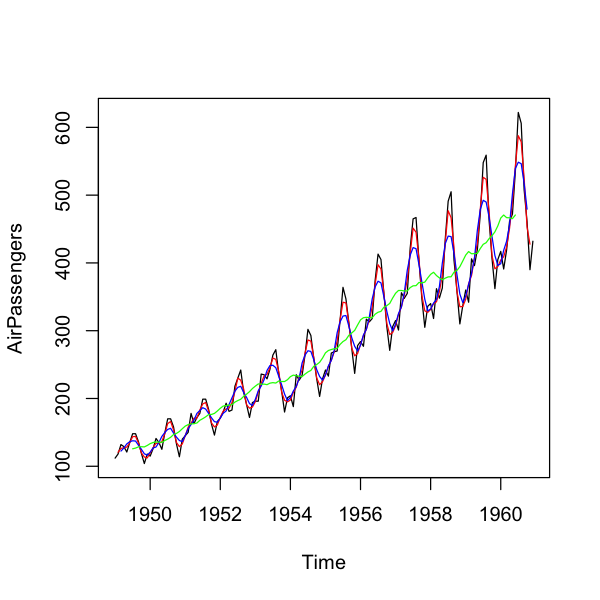

In [58]:
plot(AirPassengers)
lines(ma(AirPassengers, order = 3), col = "red")
lines(ma(AirPassengers, order = 5), col = "blue")
lines(ma(AirPassengers, order = 13), col = "green")

### Moving Averages of Moving Averages
This gives you the trend...removes the seasonal component...we do the two moving averages to recenter the data because the first one is 12 long

In [42]:
ma12 <- ma(AirPassengers, order=12, centre=FALSE)
ma2x12 <- ma(ma12, order=2, centre=TRUE)
ma2x12

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1949       NA       NA       NA       NA       NA       NA 127.0208 127.6042
1950 132.1667 134.0000 135.6667 136.9167 138.0833 139.8333 142.0417 144.4375
1951 158.3333 160.6875 162.9792 165.3958 167.8750 170.1667 172.4167 174.5208
1952 184.6667 187.6250 190.1667 192.4375 194.7083 196.9375 198.8958 200.9792
1953 217.1667 219.7083 221.9167 223.5000 224.3958 225.0208 225.3333 225.1458
1954 229.2292 231.3542 233.0833 234.7708 236.6875 239.1250 242.2292 245.5625
1955 264.2500 268.8958 273.1667 276.8542 280.2292 283.8542 287.5417 291.2917
1956 312.1875 316.5208 320.1875 323.1250 325.7917 328.3125 330.6875 333.1458
1957 350.6250 355.3125 359.5000 362.9375 365.8333 368.3125 370.3333 371.6875
1958 376.5833 378.7083 379.7500 380.3542 380.8333 381.3958 382.7500 385.0833
1959 404.8542 409.5208 414.1042 418.4167 423.0000 428.1042 432.9167 436.4167
1960 458.8542 463.2917 467.2708 471.0417 473.8958       NA       NA       NA

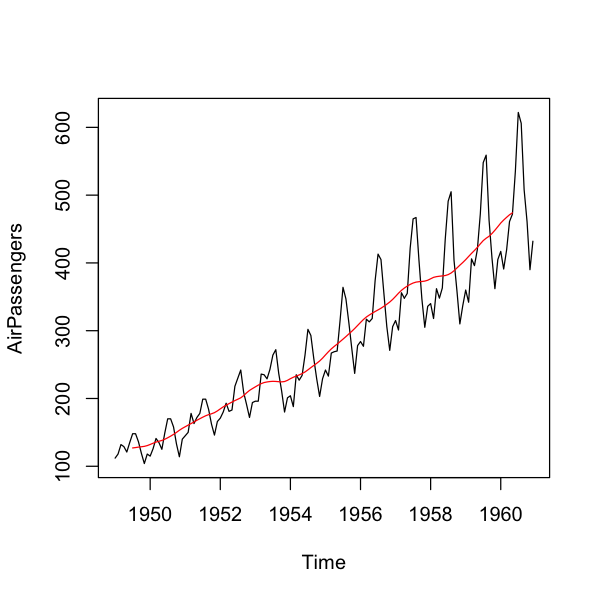

In [43]:
plot(AirPassengers)
lines(ma2x12, col = "red")

* The notation "$2 \times 12$-MA" means a 12-MA followed by a 2-MA.

## Classical Decomposition  

### Additive Decomposition

* Step 1: If the seasonal period $m$ is an even number, compute the trend-cycle component using a $2×m$-MA to obtain $\hat{T}_t$. If mm is an odd number, compute the trend-cycle component using an $m$-MA to obtain $\hat{T}_t$.

* Step 2: Calculate the detrended series: $y_t−\hat{T}_t$.

* Step 3: To estimate the seasonal component for each month, simply average the detrended values for that month. For example, the seasonal index for March is the average of all the detrended March values in the data. These seasonal indexes are then adjusted to ensure that they add to zero. The seasonal component is obtained by stringing together all the seasonal indices for each year of data. This gives $\hat{S}_t$.

* Step 4: The remainder component is calculated by subtracting the estimated seasonal and trend-cycle components: $\hat{E}_t=y_t−\hat{T}_t−\hat{S}_t$.

Seasonal components: s1 = Jan, s2 = Feb....
s1 = average(s1)
Then for each month you need to normalize. Divide each monthly average by ( s1 - avg(of all months))

### Multiplicative decomposition  

A classical multiplicative decomposition is very similar except the subtractions are replaced by divisions.

* Step 1: If the seasonal period $m$ is an even number, compute the trend-cycle component using a $2×m$-MA to obtain $\hat{T}_t$. If mm is an odd number, compute the trend-cycle component using an $m$-MA to obtain $\hat{T}_t$.

* Step 2: Calculate the detrended series: $y_t \ / \ \hat{T}_t$.

* Step 3: To estimate the seasonal component for each month, simply average the detrended values for that month. For example, the seasonal index for March is the average of all the detrended March values in the data. These seasonal indexes are then adjusted to ensure that they add to $m$.  The seasonal component is obtained by stringing together all the seasonal indices for each year of data. This gives $\hat{S}_t$.

* Step 4: The remainder component is calculated by dividing out the estimated seasonal and trend-cycle components:  $\hat{E}_t=y_t \ / \ \hat{T}_t \ / \ \hat{S}_t$.

For every point where we substracted in the additive model we need to divide in the multiplicative model (so we divide by the trend component here)

In both cases we are trying to detrend the data

### Problems with Classical Decomposition  

> * The estimate of the trend is unavailable for the first few and last few observations. For example, if $m=12$, there is no trend estimate for the first six and last six observations. Consequently, there is also no estimate of the remainder component for the same time periods.
* Classical decomposition methods assume that the seasonal component repeats from year to year. For many series, this is a reasonable assumption, but for some longer series it is not. For example, electricity demand patterns have changed over time as air conditioning has become more widespread. So in many locations, the seasonal usage pattern from several decades ago had maximum demand in winter (due to heating), while the current seasonal pattern has maximum demand in summer (due to air conditioning). The classical decomposition methods are unable to capture these seasonal changes over time.
* Occasionally, the value of the time series in a small number of periods may be particularly unusual. For example, monthly air passenger traffic may be affected by an industrial dispute making the traffic during the dispute very different from usual. The classical method is not robust to these kinds of unusual values.

## STL Decomposition  

* STL is a very versatile and robust method for decomposing time series
* STL stands for “Seasonal and Trend decomposition using Loess”  
* Loess is a method for estimating nonlinear relationships 

### Advantages of STL  

* STL can handle any type of seasonality.
* The seasonal component is allowed to change over time, and the rate of change can be controlled by the user.
* The smoothness of the trend-cycle can also be controlled by the user.
* It can be robust to outliers (i.e., the user can specify a robust decomposition). So occasional unusual observations will not affect the estimates of the trend-cycle and seasonal components. They will, however, affect the remainder component.

### Disadvantages of STL  

* It does not automatically handle trading day or calendar variation.
* It only provides facilities for additive decompositions.

**Quiz**: How can we make use of STL decomposition with a multiplicative decomposition setup?

## Forecasting with Decomposition  

* While decomposition is primarily useful for EDA, it can also be used in forecasting.  
* Assuming an additive decomposition, the decomposed time series can be written as   

$$ y_t = \hat{S}_t + \hat{A}_t$$

* Where $\hat{A}_t = \hat{T}_t + \hat{E}_t$ is the seasonally adjusted component. 

* **Q**: What would $\hat{A}_t$ be in a multiplicative decomposition?  



* To forecast a decomposed time series, we separately forecast the seasonal component, $\hat{S}_t$, and the seasonally adjusted component $\hat{A}_t$.  
    * $\hat{S}_t$: taking the estimated component from the last year
    * $\hat{A}_t$: any non-seasonal forecasting method:
        * a random walk with drift model
        * Holt’s method (will discuss this afternoon)
        * a non-seasonal ARIMA model (will discuss tomorrow)

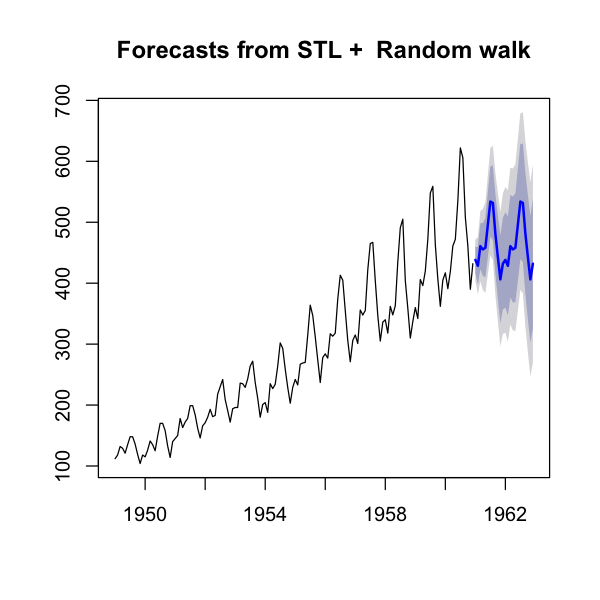

In [59]:
fcast = forecast(fit, method="naive")
plot(fcast)

### Some Simple Forecasting Methods  

* **Average method**: the forecasts of all future values are equal to the mean of the historical data  

$$ \hat{y}_{T + h} = \bar{y} = (y_1+ \dots +y_T)/T $$

* **Naive method**: all forecasts are simply set to be the value of the last observation  
 

* **Seasonal naive method**: set each forecast to be equal to the last observed value from the same season of the year (e.g., the same month of the previous year)  

* **Drift method**: allow the forecasts to increase or decrease by the average change seen in the historical data  

$$ \hat{y}_{T + h} = y_T + h(\frac{y_T - y_1}{T - 1}) $$

## Two Popular Models  

*   Exponential smoothing (ETS):
    -   Smooths out irregular shocks to model trend and seasonality
    -   Updates forecast with linear combination of past forecast and current value
    -   Also known as a "State space model"

*   ARIMA(p,d,q):
    -   A benchmark model
    -   Captures key aspects of time series data


**Exercise**  

1) Estimate the components of the `AirPassengers` data by following the steps for classical multiplicative decomposition. 

In [1]:
airdecomp = decompose(AirPassengers)
airdecomp

$x
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

$seasonal
            Jan        Feb        Mar        Apr        May        Jun
1949 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1950 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1951 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1952 -24.7487

In [2]:
library(forecast)
ma1 <- ma(AirPassengers, order=12, centre=FALSE)

ERROR: Error in library(forecast): there is no package called ‘forecast’


2) Plot the estimated seasonally adjusted component on top of the time series plot of the data.

3) Log transform the data, then apply STL decomposition to the transformed data.

4) With forecase for the next year based on the decoposition above.